# Table of Contents
* [Data Preprocessing](#data_preprocessing)
    * [EDA](#eda)
        * [Top Neighborhoods Trips](#top_neighborhoods)
        * [Taxi Companies and Rides](#taxi_companies)
    * [Hypotheses Testing](#hypotheses_testing)
        * [Checking the weather_conditions column](#average_duration)
        * [Hypothesis: Average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.](#average_duration)
    * [Overall Conclusion](#conclusion)

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly
import plotly.express as px
import warnings
from ydata_profiling import ProfileReport
warnings.filterwarnings('ignore')

In [ ]:
df_taxi = pd.read_csv('/datasets/project_sql_result_01.csv')

In [ ]:
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

## EDA

### Top Neighborhoods Trips

In [ ]:
df_trips_top = df_trips.groupby('dropoff_location_name')['average_trips'].sum().reset_index()
df_trips_rides = df_trips_top.sort_values('average_trips', ascending=False).head(10)

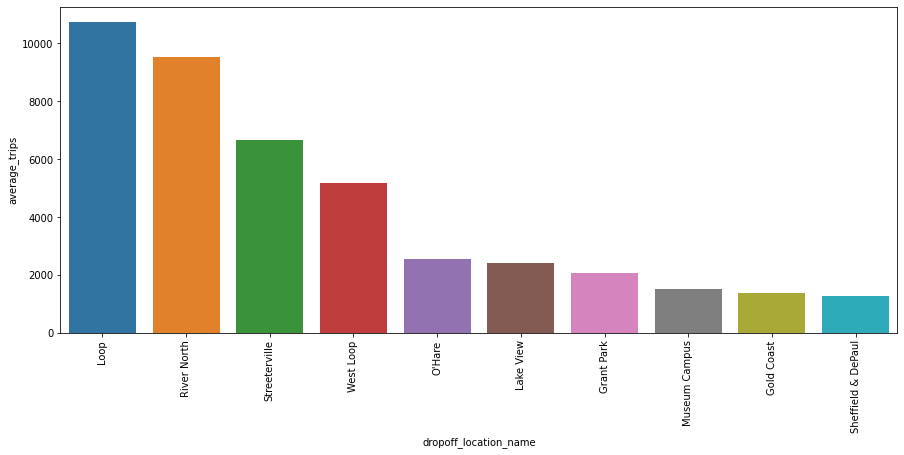

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_trips_rides, x='dropoff_location_name', y='average_trips')
plt.xticks(rotation=90)
plt.show()

* Observations
* The plot shows the top 10 neighborhoods with the highest number of drop-offs. Loop has the highest number followed by River North and Streeterville. 

### Taxi Companies and Rides

In [ ]:
df_taxi.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [ ]:
df_taxi_rides = df_taxi.sort_values(by=['trips_amount'], ascending=False).head(10)

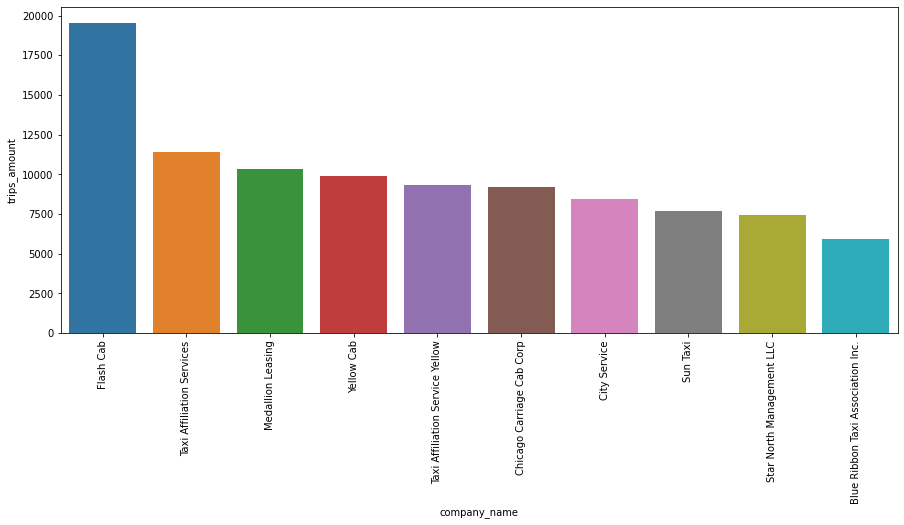

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_taxi_rides, x='company_name', y='trips_amount')
plt.xticks(rotation=90)
plt.show()

* Observations:
* The plot shows the top ten taxi companies and the number of rides from each company for Nov. 15 and 16, 2017. Flash Cab is the popular taxi company with the highest number of rides followed by Taxi Affiliation Services and Mediallion Leasing. 

## Hypothesis Testing

In [ ]:
df_airport_trips = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=[0])

In [ ]:
airport_trips_profile = ProfileReport(df_airport_trips, title="Trips Profiling Report")
airport_trips_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Observations:
* Based on the profile report about the trips from the Loop neighborhood to O'Hare airport, there 1068 rows and 3 columns, 1 numerical, 1 categorical, and 1 datetime. There are no null values.
* The numerical column is moderately evenly distributed but there are outliers. 
* No correlation of the numerical and categorical columns. 

### Checking the weather_conditions column

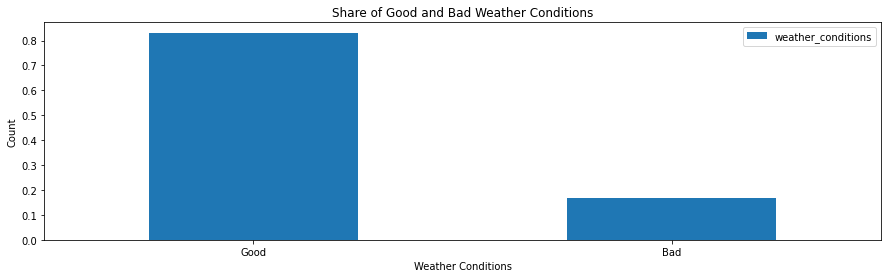

In [ ]:
df_airport_trips.weather_conditions.value_counts(normalize=True).plot(kind='bar', figsize=(15, 4), rot=0)
plt.title('Share of Good and Bad Weather Conditions')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Weather Conditions')
plt.show()

* Observations:
* The plot shows the number of trips made during good and bad conditions. It shows that there are more trips during good conditions.

In [ ]:
df_airport_trips['days'] = df_airport_trips['start_ts'].dt.day_name()

In [ ]:
df_sat = df_airport_trips.query('days == "Saturday"')

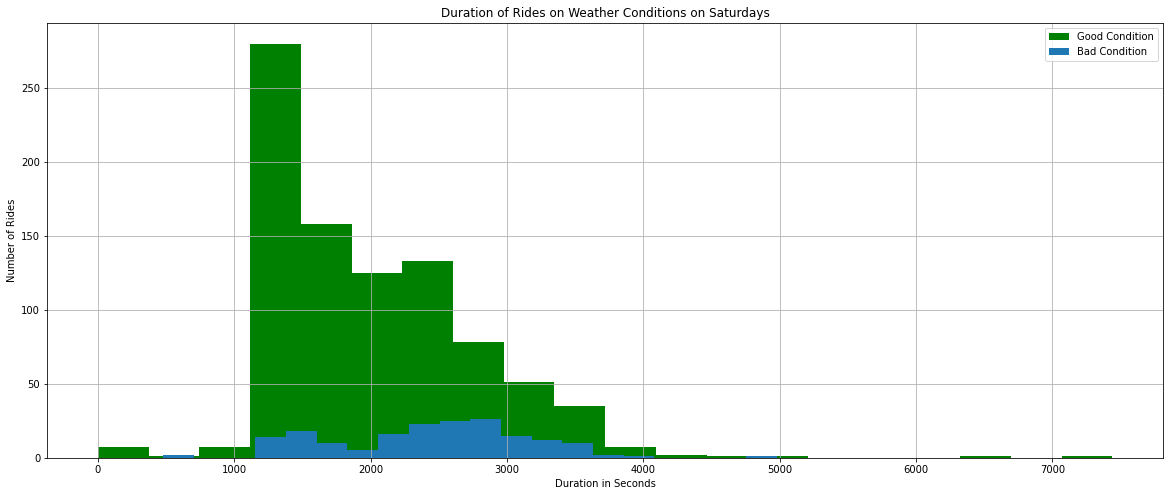

In [ ]:
df_sat[df_sat.weather_conditions == "Good"].duration_seconds.hist(bins=20, figsize=(20, 8), color='green')
df_sat[df_sat.weather_conditions == "Bad"].duration_seconds.hist(bins=20, figsize=(20, 8))
plt.title('Duration of Rides on Weather Conditions on Saturdays')
plt.ylabel('Number of Rides')
plt.xlabel('Duration in Seconds')
plt.legend(['Good Condition', 'Bad Condition'])
plt.show()

* Observations:
* Based on the plot, there are more trips in good weather conditions than bad weather conditions. 
* Looking into the histogram of trips in good weather conditions, it is skewed to the right. This means that there are more trips but short.  

### Hypothesis: Average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [ ]:
df_ave = df_sat.groupby('weather_conditions')['duration_seconds'].mean().reset_index()
df_ave

,weather_conditions,duration_seconds
0,Bad,2427.205556
1,Good,1999.675676


In [ ]:
alpha = 0.05  # critical statistical significance level

data1 = df_airport_trips.query('weather_conditions == "Good"')['duration_seconds']
data2 = df_airport_trips.query('weather_conditions == "Bad"')['duration_seconds']

results = st.ttest_ind(data1, data2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  6.517970327099473e-12
We reject the null hypothesis


* Conclusion:
* At this significance level, it can be said that there is statistically significant difference between the average duration of rides from the Loop to O'Hare International Airport on a bad weather condition (rainy) on Saturdays. This means that there are more longer trips on good weather condition than in bad weather condition.  

## Overall Conclusion

We conducted a data analysis on the number of rides taxi companies made from November 15 to 16, 2017. We found out that Flash Cab has the highest number of trip rides on the specified dates. We also conducted data analysis on the neighborhoods in Chicago were most rides ended. We found out that Loop neighborhood has the most average number of rides in November 2017. 

We conducted a statistical test to check if the average duration of rides from the Loop to O'Hare International Airport changes on a bad condition on Saturdays. At this significance level, there is enough evidence that changes occur on bad weather. There are more trips on good weather than bad weather on Saturdays.